In [8]:
#More layer visulization
from keras.layers import Convolution2D, MaxPooling2D, Activation, Conv2D
from keras.models import Sequential


import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

%matplotlib inline

In [3]:
cat = cv2.imread('cat.png')

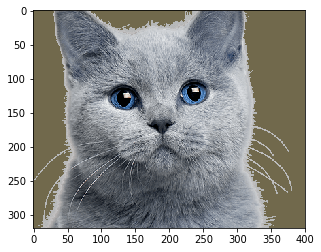

In [4]:
plt.imshow(cat)

In [5]:
# what does the image look like?
cat.shape

(320, 400, 3)

In [10]:
model = Sequential()
model.add(Conv2D(3, (3,3), input_shape=(320,400,3)))

In [11]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'name': 'conv2d_3',
   'trainable': True,
   'batch_input_shape': (None, 320, 400, 3),
   'dtype': 'float32',
   'filters': 3,
   'kernel_size': (3, 3),
   'strides': (1, 1),
   'padding': 'valid',
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'activation': 'linear',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'scale': 1.0,
     'mode': 'fan_avg',
     'distribution': 'uniform',
     'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer': None,
   'activity_regularizer': None,
   'kernel_constraint': None,
   'bias_constraint': None}}]

In [12]:
# Keras expects batches of images, so we have to add a dimension to trick it into being nice
cat_batch = np.expand_dims(cat,axis=0)

In [13]:
conv_cat = model.predict(cat_batch)

In [14]:
conv_cat.shape

(1, 318, 398, 3)

In [16]:
# here we get rid of that added dimension and plot the image
def visualize_cat(model, cat):
    # Keras expects batches of images, so we have to add a dimension to trick it into being nice
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat = model.predict(cat_batch)
    conv_cat = np.squeeze(conv_cat, axis=0)
    print(conv_cat.shape)
    plt.imshow(conv_cat)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(318, 398, 3)


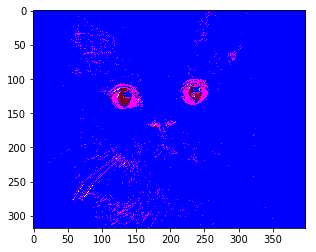

In [17]:
visualize_cat(model, cat)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(311, 391, 3)


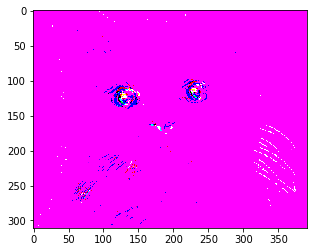

In [18]:
model = Sequential()
model.add(Conv2D(3, (10,10), input_shape=(320,400,3)))
visualize_cat(model, cat)

In [21]:
# Note: matplot lib is pretty inconsistent with how it plots these weird cat arrays.
# Try running them a couple of times if the output doesn't quite match the blog post results.
def nice_cat_printer(model, cat):
    '''prints the cat as a 2d array'''
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat2 = model.predict(cat_batch)

    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    print(conv_cat2.shape)
    conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])

    print(conv_cat2.shape)
    plt.imshow(conv_cat2)

(318, 398, 1)
(318, 398)


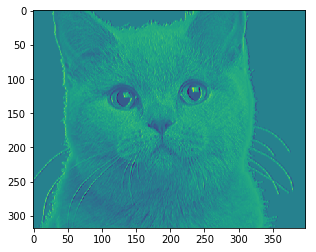

In [23]:
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(320,400,3)))

# Keras expects batches of images, so we have to add a dimension to trick it into being nice
nice_cat_printer(model, cat)

(306, 386, 1)
(306, 386)


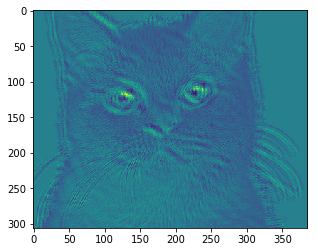

In [24]:
model = Sequential()
model.add(Conv2D(1, (15,15), input_shape=(320,400,3)))

# Keras expects batches of images, so we have to add a dimension to trick it into being nice
nice_cat_printer(model, cat)

(306, 386, 1)
(306, 386)


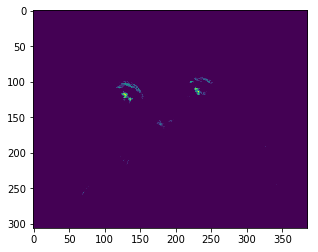

In [25]:
model = Sequential()
model.add(Conv2D(1, (15,15), input_shape=(320,400,3)))
# Lets add a new activation layer!
model.add(Activation('relu'))

nice_cat_printer(model, cat)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(318, 398, 3)


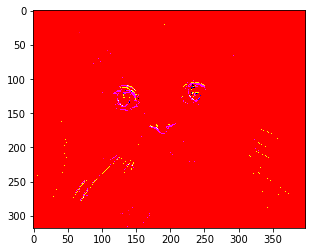

In [29]:
model = Sequential()
model.add(Conv2D(3, (3,3), input_shape=(320,400,3)))
# Lets add a new activation layer!
model.add(Activation('relu'))

visualize_cat(model, cat)

(63, 79, 1)
(63, 79)


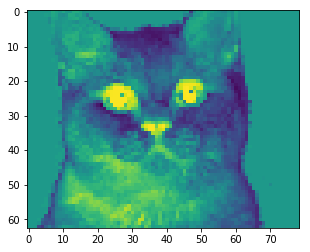

In [31]:
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(320,400,3)))
# Lets add a new activation layer!
model.add(MaxPooling2D(pool_size=(5,5)))

nice_cat_printer(model, cat)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(63, 79, 3)


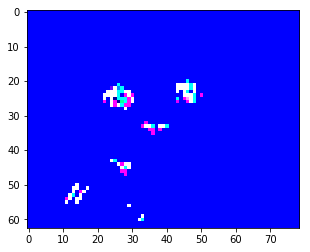

In [32]:
model = Sequential()
model.add(Conv2D(3, (3,3), input_shape=(320,400,3)))
# Lets add a new activation layer!
model.add(MaxPooling2D(pool_size=(5,5)))

# nice_cat_printer(model, cat)
visualize_cat(model, cat)

(63, 79, 1)
(63, 79)


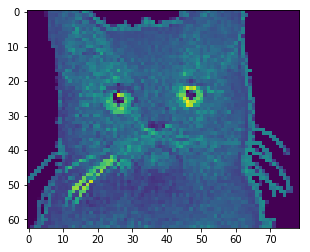

In [35]:
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(320,400,3)))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

nice_cat_printer(model, cat)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(63, 79, 3)


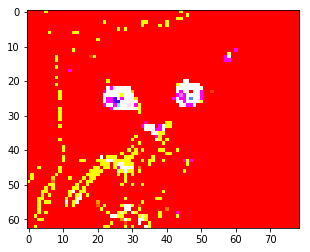

In [38]:
model = Sequential()
model.add(Conv2D(3, (3,3), input_shape=(320,400,3)))
# Lets activate then pool!
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_cat(model, cat)

(34, 43, 1)
(34, 43)


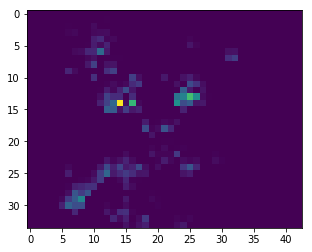

In [42]:
# 1 filter in each conv layer for pretty printing
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(320,400,3)))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(1, (3,3)))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

nice_cat_printer(model, cat)

(52, 65, 1)
(52, 65)


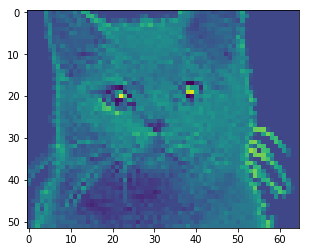

In [43]:
# 3 filters in conv1, then 1 filter for pretty printing
model = Sequential()
model.add(Conv2D(3, (3,3), input_shape=(320,400,3)))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(1, (3,3)))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

nice_cat_printer(model, cat)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(52, 65, 3)


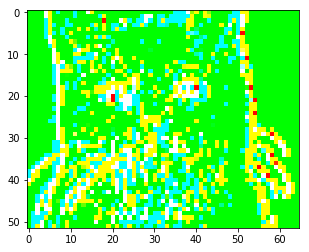

In [53]:
# 3 filters in both conv layers
model = Sequential()
model.add(Conv2D(3, (3,3), input_shape=(320,400,3)))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(3, (3,3), input_shape=(320,400,3)))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

visualize_cat(model, cat)

In [54]:
from keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
from keras.preprocessing import image
from keras.models import Model

import numpy as np
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
#https://github.com/JGuillaumin/DeepLearning-NoBlaBla/blob/master/KerasViz.ipynb

C:\Users\moona\Anaconda3\envs\testpythorch\lib\site-packages\PIL\Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
C:\Users\moona\Anaconda3\envs\testpythorch\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(224, 224, 3)


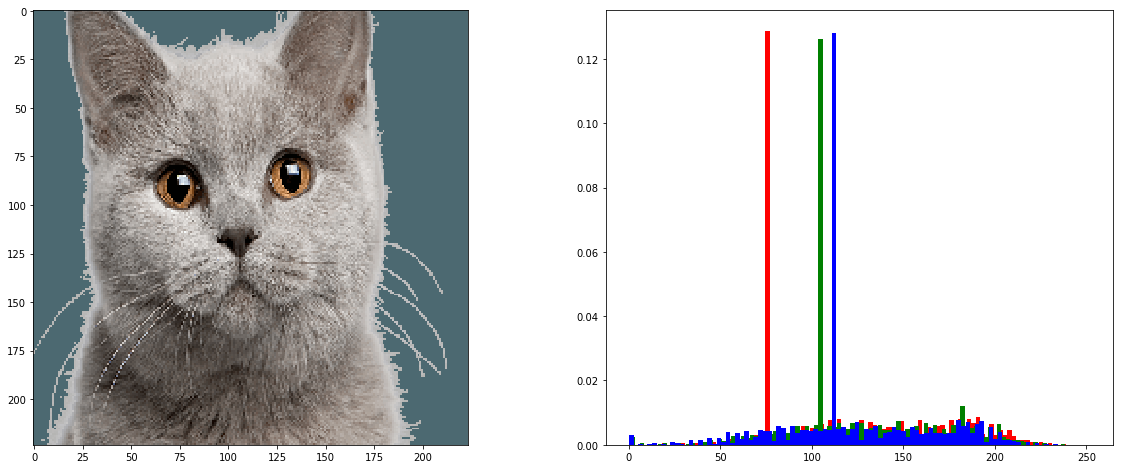

In [55]:
img_path = 'cat.PNG'
img = image.load_img(img_path, target_size=(224, 224)) # returns a PIL Image
img = image.img_to_array(img) # converts the pixel into a numpy array, with shape [224,224,3], with dtype=np.float32!


fig = plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.imshow(img.astype(np.uint8))

plt.subplot(1,2,2)
plt.hist(img[:,:,0].flatten(), bins=100, normed=True, color='r')
plt.hist(img[:,:,1].flatten(), bins=100, normed=True, color='g')
plt.hist(img[:,:,2].flatten(), bins=100, normed=True, color='b')
print(img.shape)

In [57]:
import keras
# load a complete VGG166, trained on ImageNet dataset
vgg = keras.applications.VGG16(include_top=True, weights='imagenet')

In [58]:
# preprocess the image 

# create a batch of size 1 [N,H,W,C]
img_ = np.expand_dims(img, 0) 

# specific processing for VGG : RGB -> BGR, substract mean 'BGR', to float 32
img_ = preprocess_input(img_)

In [59]:
img_.shape

(1, 224, 224, 3)

In [61]:
# apply the model to the pre-processed image : 
preds = vgg.predict(img_)

# print top 5 prediction 
pprint(decode_predictions(preds, top=10)[0])

[('n02124075', 'Egyptian_cat', 0.14587425),
 ('n02127052', 'lynx', 0.11349966),
 ('n02123394', 'Persian_cat', 0.11222539),
 ('n02123045', 'tabby', 0.09449171),
 ('n02123159', 'tiger_cat', 0.03372313),
 ('n07930864', 'cup', 0.026844058),
 ('n01622779', 'great_grey_owl', 0.026743114),
 ('n02883205', 'bow_tie', 0.025120208),
 ('n02808304', 'bath_towel', 0.023788167),
 ('n03942813', 'ping-pong_ball', 0.016968904)]


In [62]:
vgg_layers = [ layer.name for layer in vgg.layers]
print(vgg_layers)

['input_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'flatten', 'fc1', 'fc2', 'predictions']


In [63]:
# create a specific model that takes as input the input of vgg, and outputs the layer `block3_pool`
block3_pool_extractor = Model(inputs=vgg.input, outputs=vgg.get_layer('block3_pool').output)

In [64]:
block3_pool_featres = block3_pool_extractor.predict(img_)
print(block3_pool_featres.shape)
# so we gate a numpy array, with 256 features maps, of size 28x28, for 1 element.

(1, 28, 28, 256)


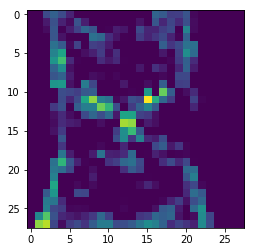

In [69]:
# plot the first feature as gray-level image 
plt.imshow(block3_pool_featres[0, :, :, 255])

In [74]:
# this function will plot all the feature maps within a fig of size (20,20)
def plot_feature_maps(feature_maps):
    height, width, depth = feature_maps.shape
    nb_plot = int(np.rint(np.sqrt(depth)))
    fig = plt.figure(figsize=(20, 20))
    for i in range(depth):
        plt.subplot(nb_plot, nb_plot, i+1)
        plt.imshow(feature_maps[:,:,i], cmap='gray')
        plt.title('feature map {}'.format(i+1))
    plt.show()

In [75]:
block3_pool_featres[0].shape

(28, 28, 256)

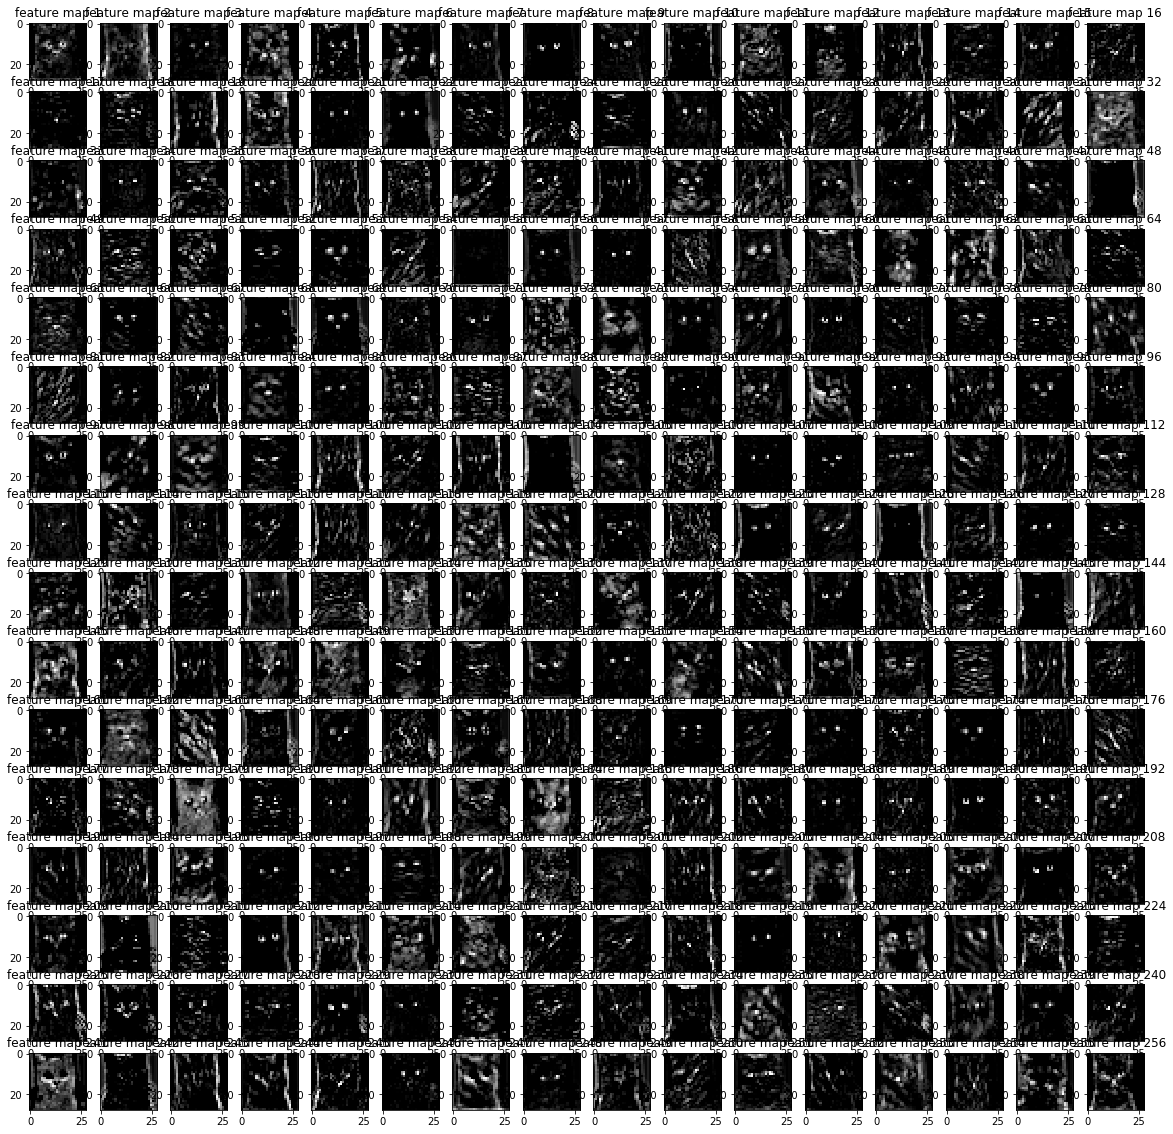

In [76]:
plot_feature_maps(block3_pool_featres[0])

In [77]:
def plot_layer(layer_name):
    # check if the layer_name is correct 
    assert layer_name in vgg_layers
    
    features_extractor = Model(inputs=vgg.input, outputs=vgg.get_layer(layer_name).output)
    feature_maps = features_extractor.predict(img_)[0]
    print("At layer \"{}\" : {} ".format(layer_name, feature_maps.shape))
    plot_feature_maps(feature_maps)

At layer "block1_conv2" : (224, 224, 64) 


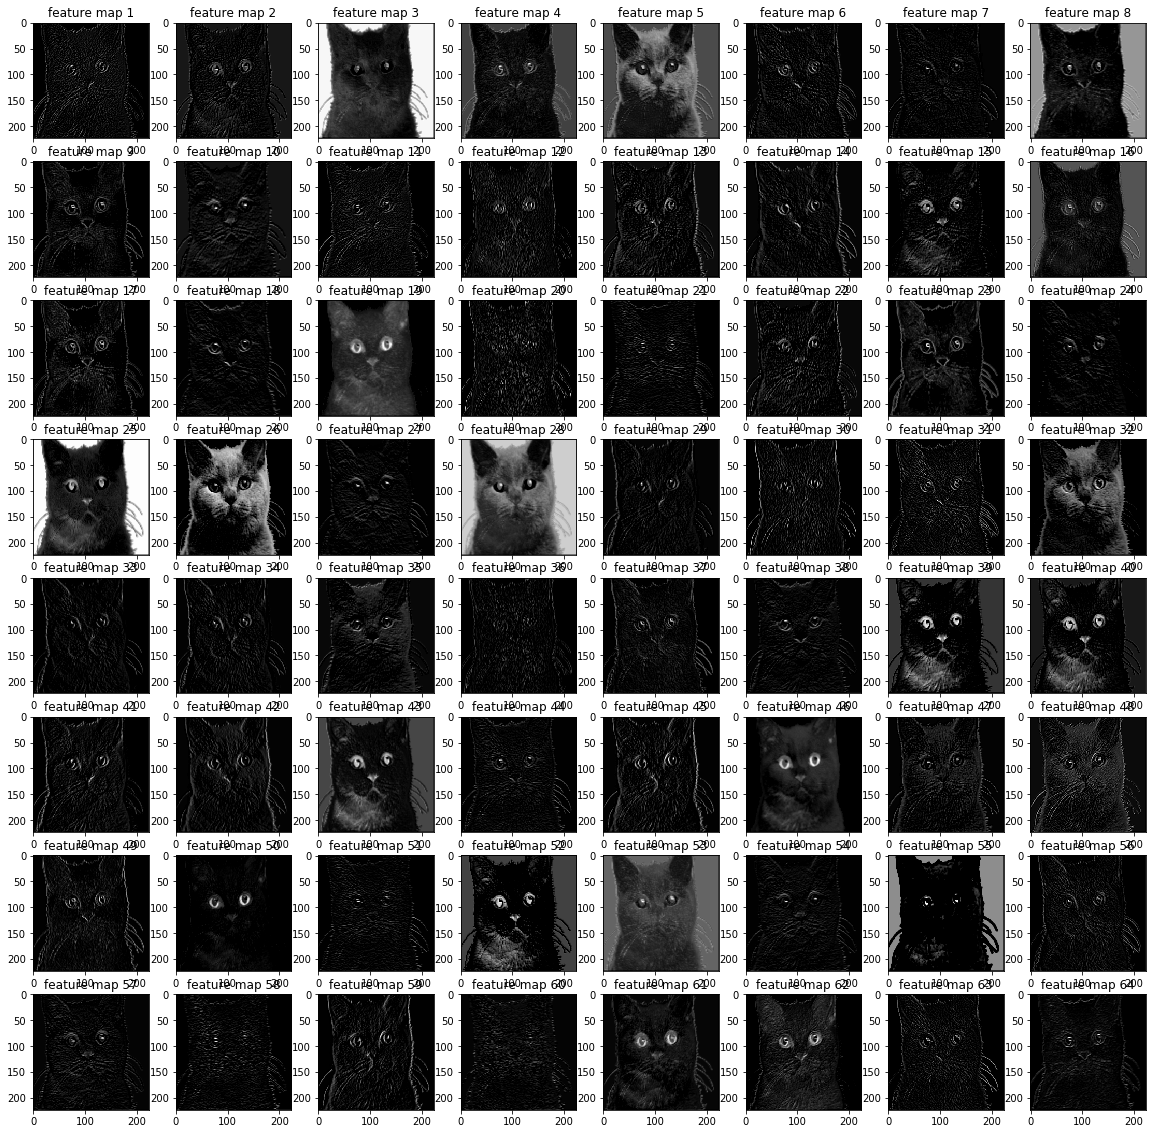

In [78]:
plot_layer('block1_conv2')

At layer "block3_conv2" : (56, 56, 256) 


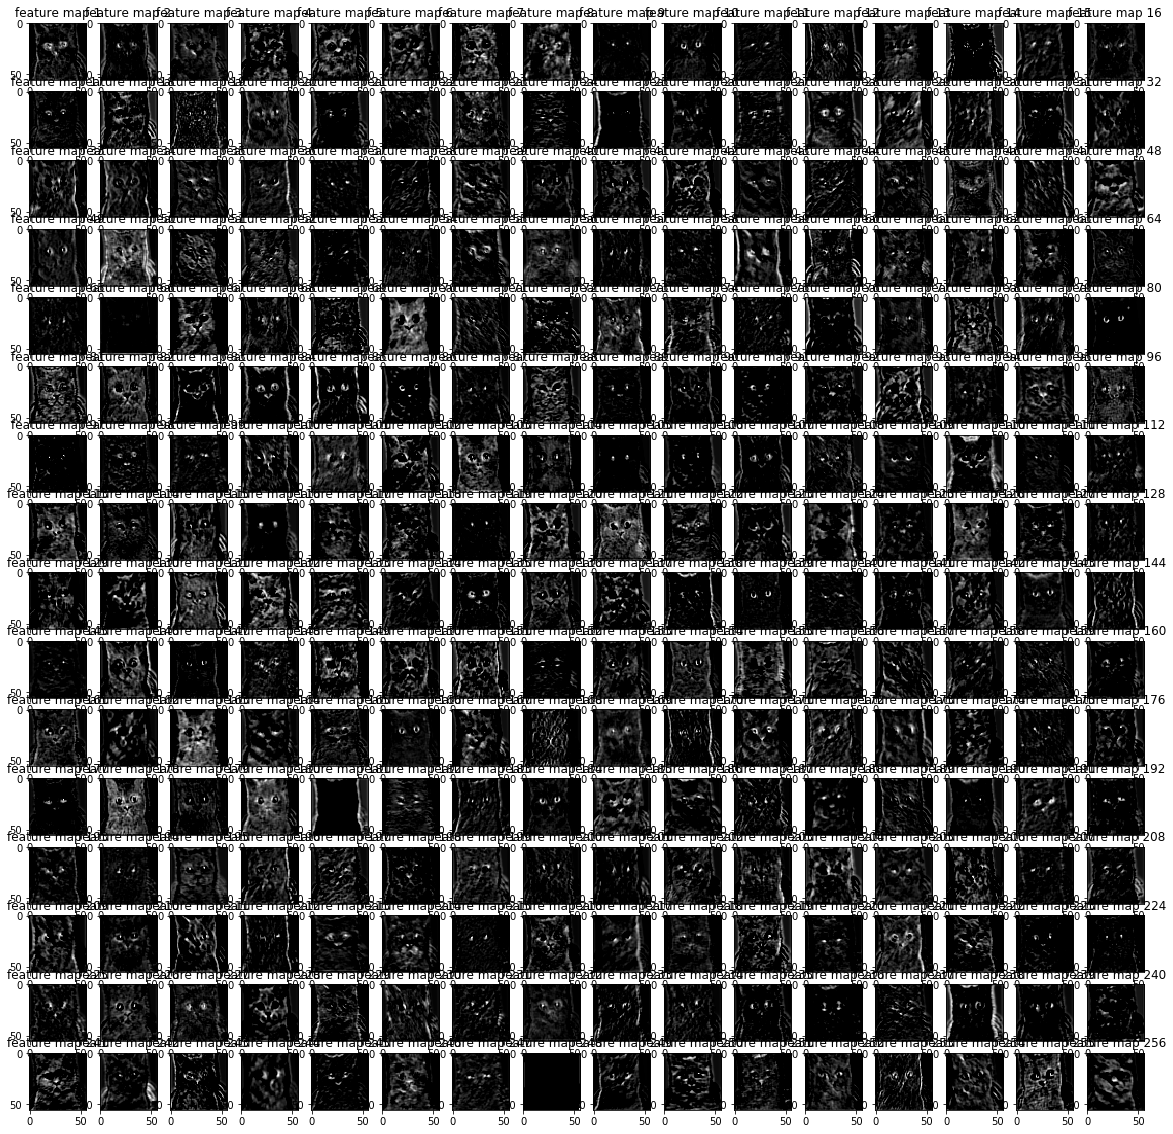

In [79]:
plot_layer('block3_conv2')